# KDE
Kernel Density Estimation

- sample particles
- calculate the average distance
- estimate the density


In [38]:
import random
import math
import matplotlib.pyplot as plt
import statistics

In [39]:
f_optimize_sigma = True
sigma_def = 5

In [40]:
rng = [0, 100]
dlt = 0.05
n_samples = 300
def genSamples(center):
    samples = []
    for i in range(n_samples):
        #samples.append(random.uniform(rng[0] + (rng[1]-rng[0])*0.1, rng[1] - (rng[1]-rng[0])*0.1))
        if i % 5 == 0:
            samples.append(rng[0] + (rng[1]-rng[0])*center)
        else:
            samples.append(random.uniform(rng[0], rng[1]))
        #samples.append(random.uniform(rng[0], rng[1]))
        #samples.append(random.gauss((rng[0]+rng[1])/2.0, (rng[1]-rng[0])/2.0 * 0.1))
    return samples
samples = genSamples(0.4)
print("max: " + str(max(samples)))
print("min: " + str(min(samples)))

max: 99.73029198594946
min: 1.2451014154077678


In [41]:
dist = 0
for i in range(n_samples):
    for j in range(i + 1, n_samples):
        dist += math.fabs(samples[i] - samples[j])
dist /= (n_samples - 1) * n_samples / 2
print(dist)
sigma_opt = dist

29.037449544068153


In [44]:
#sigma_opt = lambda s: statistics.variance(s) * math.pow(4.0/3.0/len(s), 1.0/5.0)
k = lambda x1, x2, sigma=sigma_def: math.exp(-(x1 - x2)**2/sigma/sigma/2)
x = rng[0]
N = int((rng[1]-rng[0])/dlt+1)
x_axis = [rng[0] + i * dlt for i in range(N)]

def estPDF(samples):
    x = rng[0]
    p = [0] * N
    sigma = sigma_opt if f_optimize_sigma else sigma_def
    for i in range(N):
        x = rng[0] + i * dlt
        for s in samples:
            p[i] += k(x, s, sigma)
    sum_p = sum(p) * dlt
    for i in range(len(p)):
        p[i] /= sum_p
    return p
def showPDF(p, title, ylim=None):
    plt.scatter(x_axis, p)
    plt.ylabel(title)
    if ylim != None:
        plt.ylim(0, ylim)
    plt.show()
    print('sum: ' + str(sum(p)*dlt))

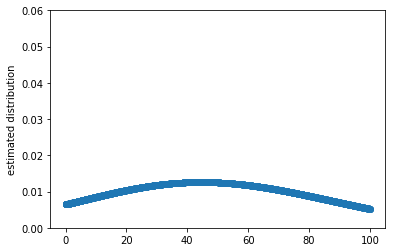

sum: 1.000000000000001


In [45]:
p = estPDF(samples)
showPDF(p, 'estimated distribution', 0.06)

(array([16.,  9., 10., 19., 12., 14.,  9., 70.,  9., 17., 10., 13.,  6.,
        17., 15., 14., 10., 12., 11.,  7.]),
 array([ 1.24510142,  6.16936094, 11.09362047, 16.01788   , 20.94213953,
        25.86639906, 30.79065859, 35.71491812, 40.63917764, 45.56343717,
        50.4876967 , 55.41195623, 60.33621576, 65.26047529, 70.18473481,
        75.10899434, 80.03325387, 84.9575134 , 89.88177293, 94.80603246,
        99.73029199]),
 <a list of 20 Patch objects>)

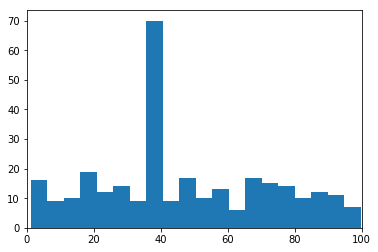

In [46]:
plt.xlim(rng[0], rng[1])
plt.hist(samples, bins=20)